<a href="https://colab.research.google.com/github/SMKProj/Binary-Classification/blob/main/Cats%26DogsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Cats & Dogs Classification with Data Augumentation using Convolution Neural Network**

In [1]:
# Importing necessary libraries

try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


**Implementing access to GOOGLE drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/cats&dogs')

Mounted at /content/drive


In [3]:
PATH = '/content/drive/MyDrive/cats&dogs'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

In [4]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = sum([len(files) for r, d, files in os.walk(test_dir)])
#total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150


**Using Image Data Generator for Data Augumentation**

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,seed=42,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary'
                                                     )
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,shuffle=True,seed=42,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary'
                                                     )
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,directory=test_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary'
                                                     )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


**Plotting 5 Images from Training Dataset**

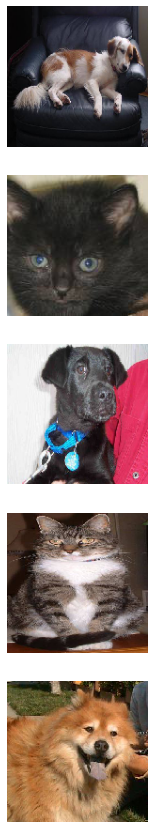

In [6]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()


sample_training_images, _ = next(train_data_gen)
#plotImages(sample_training_images[:5])

**Applying more transformations to Training Images using ImageDataGenerator**

Found 2000 images belonging to 2 classes.


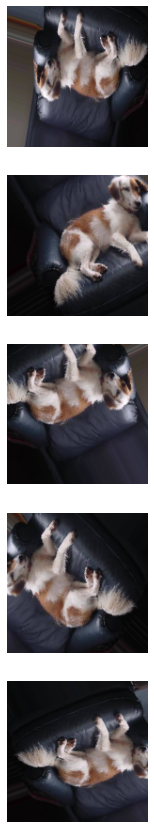

In [7]:
train_image_generator = ImageDataGenerator(vertical_flip=True, horizontal_flip=True, rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    )

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary',
                                                     shuffle=True,seed=42,
                                                     )

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Tensorflow Convolution Neural Network (CNN)**

In [27]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(16,(3,3), activation="relu",input_shape = (150,150,3))) #148
model.add(tf.keras.layers.MaxPooling2D(2,2)) #74

model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu")) #72
model.add(tf.keras.layers.MaxPooling2D(2,2)) #36

model.add(tf.keras.layers.Conv2D(64, (3,3),activation="relu")) #34
model.add(tf.keras.layers.MaxPooling2D(2,2)) #17

model.add(tf.keras.layers.Conv2D(128, (3,3),activation="relu")) #15
model.add(tf.keras.layers.MaxPooling2D(2,2)) #7

model.add(tf.keras.layers.Conv2D(128, (3,3),activation="relu")) #5
model.add(tf.keras.layers.MaxPooling2D(2,2)) #3

model.add(tf.keras.layers.Flatten())
#model.add(keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512, activation='relu'))
#model.add(keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 64)      

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
#model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs_steps = train_data_gen.n // train_data_gen.batch_size # 2000 images  = batchsize * steps
val_steps = val_data_gen.n//val_data_gen.batch_size  # 1000 images  = batchsize * steps
history=model.fit(train_data_gen, epochs=50, validation_data=val_data_gen, steps_per_epoch=epochs_steps, validation_steps=val_steps )

**Plotting CNN model Accuracy and Loss for Training and Validation Data**

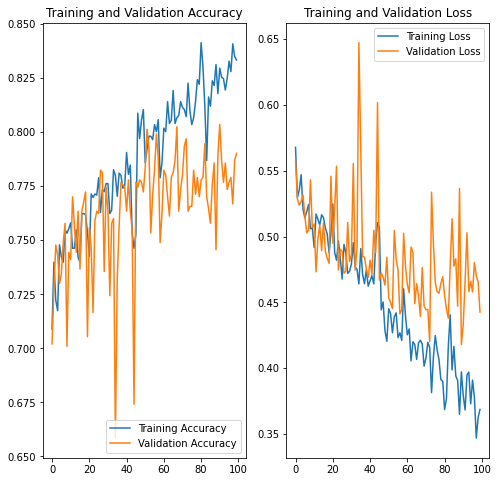

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Evaluating CNN model on Validation Data**

In [48]:
model.evaluate(val_data_gen)

8/8 [==============================] - 4s 446ms/step - loss: 0.4447 - accuracy: 0.7890


[0.44465455412864685, 0.7889999747276306]

**Predicting CNN model on Test Data**

In [49]:
test_steps = test_data_gen.n//test_data_gen.batch_size
probabilities = model.predict(test_data_gen)

In [50]:
predicted_class_indices = np.argmax(probabilities,axis=1)

In [51]:
predicted_class_indices

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [42]:
labels = (train_data_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

{0: 'cats', 1: 'dogs'}

In [43]:
class_labels = ['cats', 'dogs']
predictions = [class_labels[k] for k in predicted_class_indices]

In [38]:
print(predicted_class_indices)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
sample_test_images, _ = next(test_data_gen)
#plotImages(sample_test_images,probabilities)

In [39]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
        correct +=1

print('Correct: ', correct)
percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Correct:  30
Your model correctly identified 0.6% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
